In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [15]:
#taking input from user
client = str(input("Enter Client Name : "))
legal = str(input("Enter Legal Entity (eg. CitiBank Pune) : "))

Enter Client Name : HSBC
Enter Legal Entity (eg. CitiBank Pune) : CitiBank London


In [16]:
df = pd.read_csv(r'C:/Users/user/Desktop/TimeSeriesPrediction/dataset.csv', parse_dates = ['Date'], index_col = 'Date')
ts = df[(df['Client Name'] == client) & (df['Legal Entity'] == legal)]['Net Amount']

In [17]:
ts.head()

Date
2010-01-01   -80682
2010-02-01   -11362
2010-03-01   -57350
2010-04-01   -49076
2010-05-01   -12134
Name: Net Amount, dtype: int64

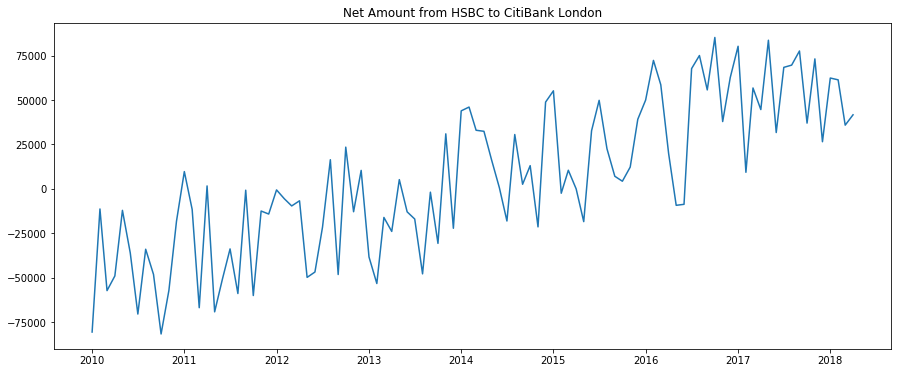

In [18]:
plt.figure(figsize=(15, 6))
plt.title('Net Amount from {} to {}'.format(client,legal))
plt.plot(ts)
plt.show()

In [19]:
#testing stationarity using graphs
def test_stationarity(ts):
        rolmean = ts.rolling(window = 12).mean()
        rolstd = ts.rolling(window = 12).std()
       
        #graphical analysis of rollmean and rollstd
        plt.figure(figsize=(15, 6))
        orig = plt.plot(ts, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)


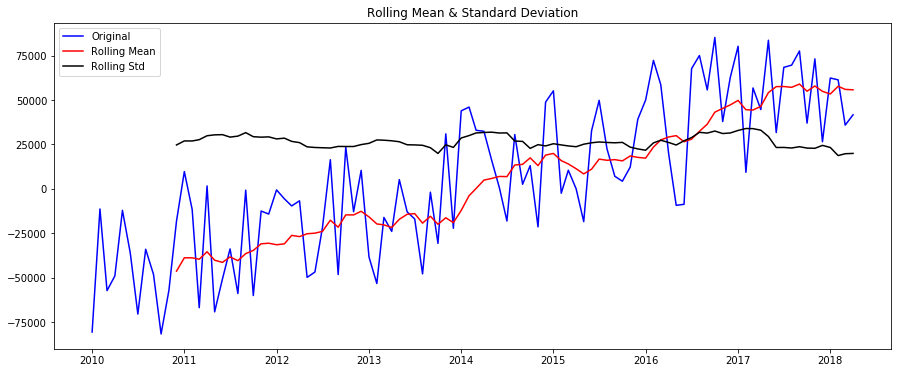

In [20]:
test_stationarity(ts)

In [25]:
#Dickey-Fuller Test
def dickey_f_test(ts):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    pval = dfoutput['p-value']
    print(f'Result: The series is {"not " if pval > 0.05 else ""}stationary')

In [26]:
dickey_f_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                 -0.671053
p-value                         0.854106
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64
Result: The series is not stationary


In [27]:
#KPSS Test
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [28]:
kpss_test(ts)    

KPSS Statistic: 0.8430852529228541
p-value: 0.01
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1708: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


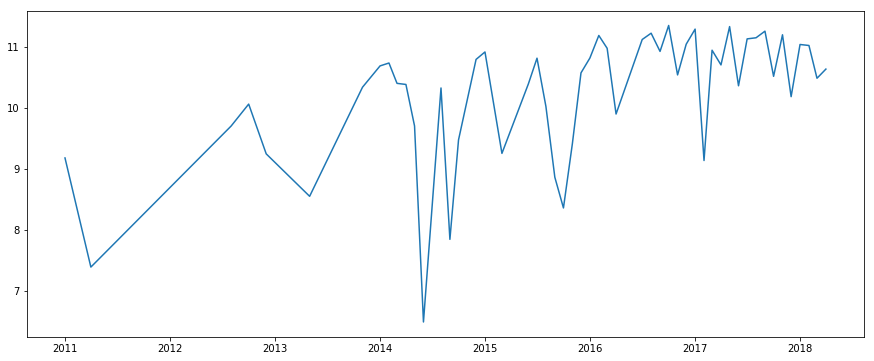

In [32]:
#Applying log transform
ts_log = np.log(ts)
ts_log.dropna(inplace= True)
#print(ts_log)
plt.figure(figsize=(15, 6))
plt.plot(ts_log)

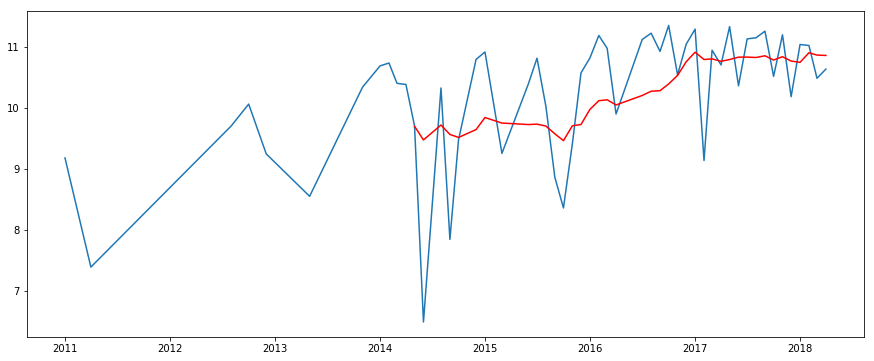

In [33]:
#Moving Avg Method for making series stationary
moving_avg = ts_log.rolling(12).mean()
plt.figure(figsize=(15, 6))
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [34]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)
ts_log_moving_avg_diff.dropna(inplace=True)

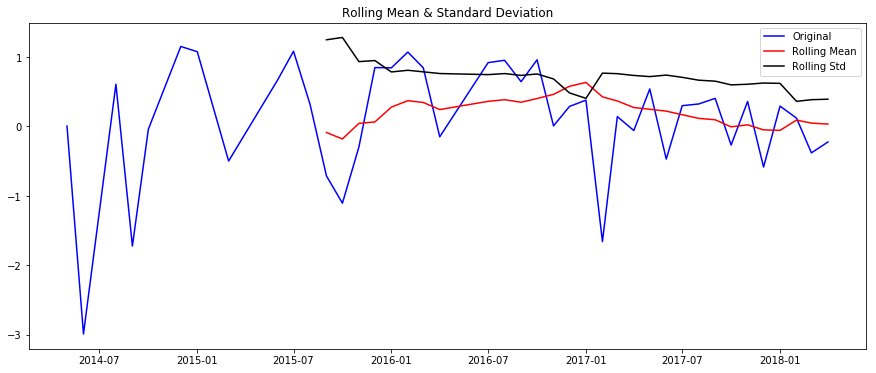

Results of Dickey-Fuller Test:
Test Statistic                -5.803592e+00
p-value                        4.570736e-07
#Lags Used                     0.000000e+00
Number of Observations Used    4.000000e+01
Critical Value (1%)           -3.605565e+00
Critical Value (5%)           -2.937069e+00
Critical Value (10%)          -2.606986e+00
dtype: float64
Result: The series is stationary


In [35]:
#testing results of moving avg method
test_stationarity(ts_log_moving_avg_diff)
dickey_f_test(ts_log_moving_avg_diff)

Date
2011-01-01     9.179984
2011-04-01     8.258927
2012-08-01     8.768650
2012-10-01     9.120932
2012-12-01     9.149130
2013-05-01     9.034479
2013-11-01     9.254884
2014-01-01     9.472536
2014-02-01     9.647651
2014-03-01     9.744353
2014-04-01     9.820885
2014-05-01     9.807833
2014-06-01     9.455109
2014-08-01     9.543451
2014-09-01     9.378932
2014-10-01     9.387994
2014-12-01     9.514376
2015-01-01     9.636302
2015-03-01     9.604177
2015-06-01     9.668992
2015-07-01     9.760648
2015-08-01     9.781196
2015-09-01     9.711130
2015-10-01     9.610007
2015-11-01     9.595502
2015-12-01     9.666267
2016-01-01     9.748217
2016-02-01     9.849097
2016-03-01     9.927103
2016-04-01     9.925295
2016-07-01    10.005991
2016-08-01    10.087283
2016-09-01    10.142699
2016-10-01    10.221734
2016-11-01    10.242463
2016-12-01    10.293992
2017-01-01    10.357591
2017-02-01    10.280555
2017-03-01    10.322370
2017-04-01    10.346287
2017-05-01    10.407501
2017-06-01 

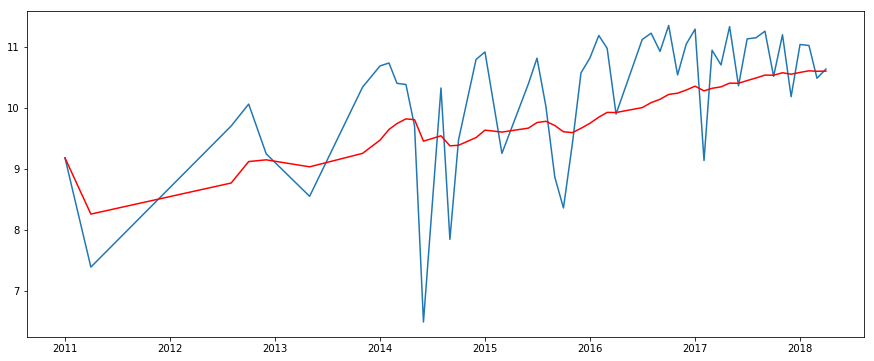

In [36]:
#exponential moving Avg Method for making series stationary
expwighted_avg = pd.Series.ewm(ts_log,halflife=12).mean()
plt.figure(figsize=(15, 6))
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
expwighted_avg

In [37]:
ts_log_ewma_diff = ts_log - expwighted_avg

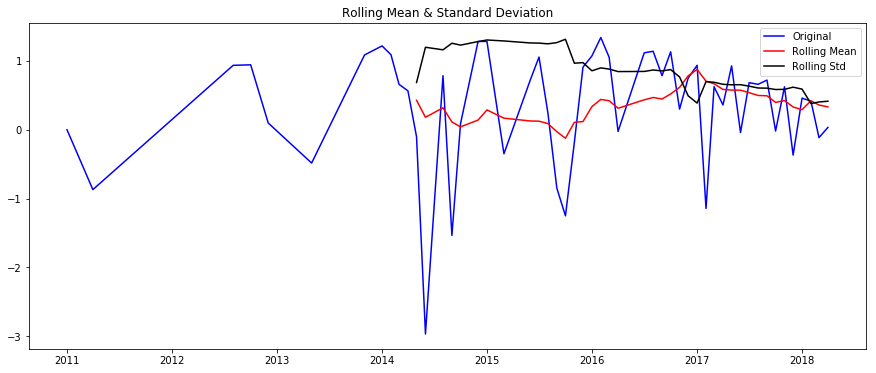

Results of Dickey-Fuller Test:
Test Statistic                -6.242908e+00
p-value                        4.650231e-08
#Lags Used                     0.000000e+00
Number of Observations Used    5.100000e+01
Critical Value (1%)           -3.565624e+00
Critical Value (5%)           -2.920142e+00
Critical Value (10%)          -2.598015e+00
dtype: float64
Result: The series is stationary


In [38]:
#testing results of exponential moving avg method
ts_log_ewma_diff.dropna(inplace=True)
test_stationarity(ts_log_ewma_diff)
dickey_f_test(ts_log_ewma_diff)